In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import statsmodels.formula.api as smf

%matplotlib inline

## Importing, filtering and normalizing datasets

Importing **DMSO 24hr expt1** as **adata_ref** and **Trametinib 24hr expt1** as **adata**.

In [2]:
adata_ref =sc.read_10x_mtx('../data/DMSO_24hr_expt1/') 

In [3]:
adata = sc.read_10x_mtx('../data/Trametinib_24hr_expt1/')

In [4]:
adata_ref.strings_to_categoricals()
adata.strings_to_categoricals()

Creating dataframe.

In [5]:
adata_ref.to_df()  
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGCATCTCGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGATCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGCAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCAGAATA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCCGTAGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGGATCTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACATAAGACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCACTGGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCCGCGCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [6]:
sc.pp.filter_cells(adata_ref, min_genes=200)
sc.pp.filter_genes(adata_ref, min_cells=3)

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes. The values have been adjusted according to the scatter plots seen in the exploratory notebooks.

In [7]:
adata_ref.var['mt'] = adata_ref.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata_ref, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [8]:
adata_ref = adata_ref[adata_ref.obs.n_genes_by_counts < 5000, :] 
adata_ref = adata_ref[adata_ref.obs.pct_counts_mt < 20, :]

adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing. Defining the data on the same variables to be able to run `sc.tl.ingest`. Running principal component analysis (PCA), computing the neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [9]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)

In [11]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [13]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

## Adding metadata

Metadata is included from both the *Classifications.csv* files and the <a href="https://depmap.org/portal/download/" target="_blank">DepMap</a> database. Necessary datasets to download from DepMap linked below.
Specifying **meta_ref** as **DMSO 24h expt1 metadata** and **meta** as **Trametinib 24h expt1 metadata**. Metadata are added to adata.

In [14]:
meta_ref = pd.read_csv('../data/DMSO_24hr_expt1/classifications.csv', sep=',', header=0, index_col=0)

In [15]:
adata_ref.obs['Cell type'] = meta_ref.loc[adata_ref.obs.index, 'singlet_ID']

In [16]:
meta = pd.read_csv('../data/Trametinib_24hr_expt1/classifications.csv', sep=',', header=0, index_col=0)

In [17]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [18]:
adata.obs['DepMap_ID'] = meta.loc[adata.obs.index, 'DepMap_ID']
adata_ref.obs['DepMap_ID'] = meta_ref.loc[adata_ref.obs.index, 'DepMap_ID']

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


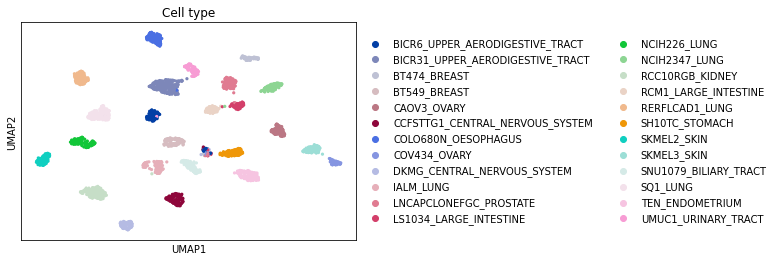

In [19]:
sc.pl.umap(adata, color='Cell type') 

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


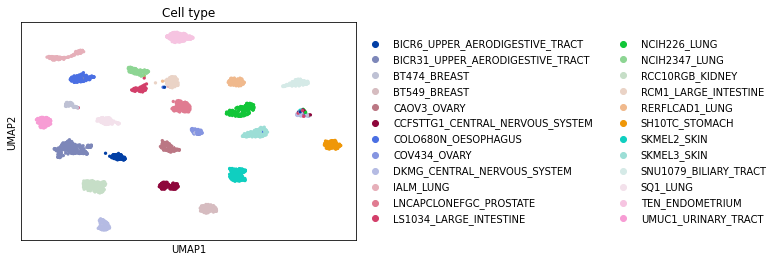

In [20]:
sc.pl.umap(adata_ref, color='Cell type') 

## Filtering MAPK genes, adding mutation counts

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261527" target="_blank">CCLE_mutations.csv </a> to download.

Since Trametinib is a mitogen-activated protein kinase kinase inhibitor, we are filtering for MAPK genes.

In [21]:
mut = pd.read_csv('../data/DepMap/CCLE_mutations.csv', sep='\t', header=0, index_col=None)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
fil = np.in1d(mut['Hugo_Symbol'], ['BRAF', 'KRAS', 'NRAS', 'HRAS'])   
mut = mut[fil]
mut

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
121592,BRAF,673,37,7,140434423,140434423,+,Nonsense_Mutation,SNP,C,...,NaN,NaN,68:432,107:634,NaN,NaN,NaN,NaN,damaging,ACH-002121
121593,BRAF,673,37,7,140434435,140434435,+,Missense_Mutation,SNP,T,...,NaN,84:190,NaN,NaN,NaN,NaN,NaN,NaN,other non-conserving,ACH-001960
121594,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,NaN,129:342,133:357,7:24,NaN,NaN,NaN,other non-conserving,ACH-000962
121595,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,95:263,NaN,NaN,NaN,7:41,NaN,NaN,other non-conserving,ACH-001145
121596,BRAF,673,37,7,140434475,140434475,+,Silent,SNP,C,...,NaN,NaN,NaN,70:416,NaN,NaN,NaN,NaN,silent,ACH-000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747719,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,33:97,32:93,NaN,65:241,NaN,NaN,other non-conserving,ACH-001127
747720,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,54:89,53:91,289:272,104:143,NaN,NaN,other non-conserving,ACH-000937
747721,NRAS,4893,37,1,115258748,115258748,+,Missense_Mutation,SNP,C,...,NaN,NaN,55:61,52:57,NaN,NaN,NaN,NaN,other non-conserving,ACH-002241
747722,NRAS,4893,37,1,115258767,115258767,+,Silent,SNP,T,...,NaN,NaN,72:269,68:248,88:746,NaN,NaN,NaN,silent,ACH-000319


In [23]:
mut['Variant_Classification'].value_counts()

Missense_Mutation    588
Silent               119
Splice_Site           14
Frame_Shift_Del       12
In_Frame_Del           7
Nonsense_Mutation      3
In_Frame_Ins           3
Frame_Shift_Ins        3
Name: Variant_Classification, dtype: int64

Keeping activating missense mutations since they affect the function of Trametinib.

In [24]:
fil = mut['Variant_Classification'] == 'Missense_Mutation'
mut = mut[fil]

Verifying mutation counts by DepMap IDs.

In [25]:
mut_count = mut['DepMap_ID'].value_counts()
mut_count

ACH-000935    3
ACH-000810    3
ACH-000718    3
ACH-000941    3
ACH-000999    3
             ..
ACH-000805    1
ACH-000496    1
ACH-001355    1
ACH-002246    1
ACH-000829    1
Name: DepMap_ID, Length: 524, dtype: int64

Adding mutation counts to dataframes as *'MAPK_mut_count'*.

In [26]:
common_cells = list(set(adata.obs['DepMap_ID']) & set(mut_count.index))
adata.obs['MAPK_mut_count'] = 0
fil = np.in1d(adata.obs['DepMap_ID'], common_cells)
adata.obs.loc[adata.obs.index[fil], 'MAPK_mut_count'] = mut_count[adata.obs['DepMap_ID'][fil].values].values

In [27]:
common_cells = list(set(adata_ref.obs['DepMap_ID']) & set(mut_count.index))
adata_ref.obs['MAPK_mut_count'] = 0
fil = np.in1d(adata_ref.obs['DepMap_ID'], common_cells)
adata_ref.obs.loc[adata_ref.obs.index[fil], 'MAPK_mut_count'] =\
    mut_count[adata_ref.obs['DepMap_ID'][fil].values].values

In [28]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,MAPK_mut_count
AAACCTGAGTGTCCAT-1,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0
AAACCTGTCTCCTATA-1,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1
AAACGGGAGGCATGTG-1,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,0
AAACGGGAGTGCCATT-1,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,0
AAACGGGCAGGTCGTC-1,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0
...,...,...,...,...,...,...,...,...
TTTGTCAAGCTCCTCT-1,3897,3896,19128.0,720.0,3.764115,CAOV3_OVARY,ACH-000713,0
TTTGTCAAGTCTCAAC-1,3818,3817,22015.0,602.0,2.734499,RCC10RGB_KIDNEY,ACH-000189,0
TTTGTCAAGTTGTAGA-1,4019,4019,27120.0,1774.0,6.541297,IALM_LUNG,ACH-000672,1
TTTGTCACATGAAGTA-1,4182,4182,24644.0,749.0,3.039279,CAOV3_OVARY,ACH-000713,0


## Adding copy number variation

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261524" target="_blank">CCLE_gene_cn.csv </a> to download.

In [29]:
cnv = pd.read_csv('../data/DepMap/CCLE_gene_cn.csv', sep=',', header=0, index_col=0)

Filtering MAPK genes.

In [30]:
cnv_BRAF = cnv.loc[:,cnv.columns.str.startswith("BRAF")]
cnv_BRAF 

,BRAF (673)
ACH-000001,1.046850
ACH-000002,1.004020
ACH-000003,1.091531
ACH-000004,0.816365
ACH-000005,0.831232
...,...
ACH-002510,1.351090
ACH-002511,1.678063
ACH-001421,0.976895
ACH-001711,1.089226


In [31]:
cnv_BRAF = cnv_BRAF['BRAF (673)']
cnv_BRAF

ACH-000001    1.046850
ACH-000002    1.004020
ACH-000003    1.091531
ACH-000004    0.816365
ACH-000005    0.831232
                ...   
ACH-002510    1.351090
ACH-002511    1.678063
ACH-001421    0.976895
ACH-001711    1.089226
ACH-001656    0.610982
Name: BRAF (673), Length: 1745, dtype: float64

In [32]:
cnv_KRAS = cnv.loc[:,cnv.columns.str.startswith("KRAS")]
cnv_KRAS

,KRAS (3845)
ACH-000001,1.146624
ACH-000002,0.994210
ACH-000003,1.245132
ACH-000004,1.074006
ACH-000005,1.126038
...,...
ACH-002510,1.379501
ACH-002511,0.630726
ACH-001421,0.976324
ACH-001711,1.094477


In [33]:
cnv_KRAS = cnv_KRAS['KRAS (3845)']
cnv_KRAS

ACH-000001    1.146624
ACH-000002    0.994210
ACH-000003    1.245132
ACH-000004    1.074006
ACH-000005    1.126038
                ...   
ACH-002510    1.379501
ACH-002511    0.630726
ACH-001421    0.976324
ACH-001711    1.094477
ACH-001656    1.041681
Name: KRAS (3845), Length: 1745, dtype: float64

In [34]:
cnv_NRAS = cnv.loc[:,cnv.columns.str.startswith("NRAS")]
cnv_NRAS

,NRAS (4893)
ACH-000001,1.432613
ACH-000002,1.009073
ACH-000003,0.689230
ACH-000004,1.082798
ACH-000005,1.110107
...,...
ACH-002510,0.708653
ACH-002511,0.945478
ACH-001421,0.975735
ACH-001711,1.121632


In [35]:
cnv_NRAS = cnv_NRAS['NRAS (4893)']
cnv_NRAS 

ACH-000001    1.432613
ACH-000002    1.009073
ACH-000003    0.689230
ACH-000004    1.082798
ACH-000005    1.110107
                ...   
ACH-002510    0.708653
ACH-002511    0.945478
ACH-001421    0.975735
ACH-001711    1.121632
ACH-001656    1.036999
Name: NRAS (4893), Length: 1745, dtype: float64

In [36]:
cnv_HRAS = cnv.loc[:,cnv.columns.str.startswith("HRAS")]
cnv_HRAS

,HRAS (3265)
ACH-000001,0.756759
ACH-000002,0.996967
ACH-000003,1.104372
ACH-000004,0.830062
ACH-000005,0.833802
...,...
ACH-002510,1.194098
ACH-002511,1.028324
ACH-001421,0.985983
ACH-001711,1.127647


In [37]:
cnv_HRAS = cnv_HRAS['HRAS (3265)']
cnv_HRAS 

ACH-000001    0.756759
ACH-000002    0.996967
ACH-000003    1.104372
ACH-000004    0.830062
ACH-000005    0.833802
                ...   
ACH-002510    1.194098
ACH-002511    1.028324
ACH-001421    0.985983
ACH-001711    1.127647
ACH-001656    0.671628
Name: HRAS (3265), Length: 1745, dtype: float64

Adding MAPK genes (BRAF, KRAS, HRAS, NRAS) copy number variation to dataframes as *'BRAF_cnv'*, *'KRAS_cnv'*, *'HRAS_cnv'*, *'KRAS_cnv'*.

In [38]:
adata.obs['BRAF_cnv'] = adata.obs['DepMap_ID'].map(cnv_BRAF)
adata_ref.obs['BRAF_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_BRAF)

In [39]:
adata.obs['KRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_KRAS)
adata_ref.obs['KRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_KRAS)

In [40]:
adata.obs['HRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_HRAS)
adata_ref.obs['HRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_HRAS)

In [41]:
adata.obs['NRAS_cnv'] = adata.obs['DepMap_ID'].map(cnv_NRAS)
adata_ref.obs['NRAS_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_NRAS)

In [42]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,MAPK_mut_count,BRAF_cnv,KRAS_cnv,HRAS_cnv,NRAS_cnv
AAACCTGAGTGTCCAT-1,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425
AAACCTGTCTCCTATA-1,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1,1.138067,2.353112,1.189091,1.077410
AAACGGGAGGCATGTG-1,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,0,1.081538,0.854545,0.980389,0.800929
AAACGGGAGTGCCATT-1,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,0,0.816903,1.177003,0.932287,1.024539
AAACGGGCAGGTCGTC-1,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGCTCCTCT-1,3897,3896,19128.0,720.0,3.764115,CAOV3_OVARY,ACH-000713,0,1.088321,0.656400,0.735449,1.118592
TTTGTCAAGTCTCAAC-1,3818,3817,22015.0,602.0,2.734499,RCC10RGB_KIDNEY,ACH-000189,0,1.065767,1.078218,0.958742,0.912997
TTTGTCAAGTTGTAGA-1,4019,4019,27120.0,1774.0,6.541297,IALM_LUNG,ACH-000672,1,1.178840,2.191558,1.147486,0.964448
TTTGTCACATGAAGTA-1,4182,4182,24644.0,749.0,3.039279,CAOV3_OVARY,ACH-000713,0,1.088321,0.656400,0.735449,1.118592


## Adding pathway activity 

Pathway activities have been calculated. See files: **PROGENy_DMSO_24h_expt1.R** and **PROGENy_Trametinib_24h_expt1.R**.

In [43]:
pw_dmso = pd.read_csv('../results/pw_activity_dmso_24h_expt1.csv', sep=',', header=0, index_col=0)
pw_treated = pd.read_csv('../results/pw_activity_trametinib_24h_expt1.csv', sep=',', header=0, index_col=0)

In [44]:
adata.obs['MAPK_activity'] = pw_treated['MAPK']
adata_ref.obs['MAPK_activity'] = pw_dmso['MAPK']

## Integrating datasets

In [45]:
sc.tl.ingest(adata, adata_ref, obs='Cell type')

Creating a new variable named **adata_concat** that stores the integrated data. We will be using this dataframe from now on.

In [46]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['DMSO', 'Trametinib'])

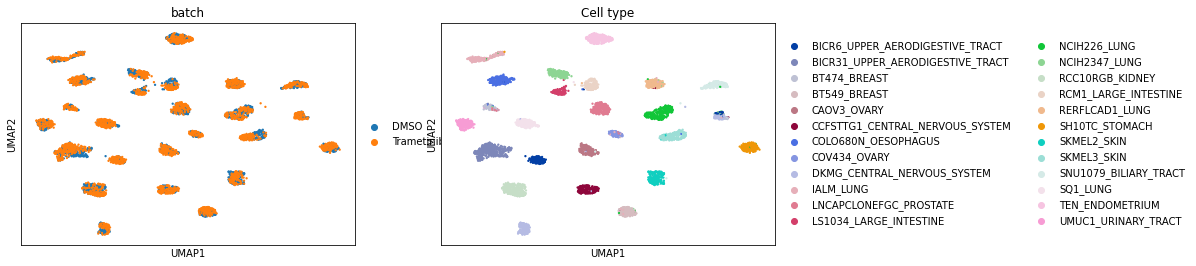

In [47]:
 sc.pl.umap(adata_concat, color=['batch', 'Cell type'])

In [48]:
adata_concat.obs['BRAF_cnv']= adata_concat.obs['BRAF_cnv'].astype('float64')
adata_concat.obs['KRAS_cnv']= adata_concat.obs['KRAS_cnv'].astype('float64')
adata_concat.obs['NRAS_cnv']= adata_concat.obs['NRAS_cnv'].astype('float64')
adata_concat.obs['HRAS_cnv']= adata_concat.obs['HRAS_cnv'].astype('float64')

In [49]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,MAPK_mut_count,BRAF_cnv,KRAS_cnv,HRAS_cnv,NRAS_cnv,MAPK_activity,batch
AAACCTGAGTGTCCAT-1-DMSO,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425,-0.392047,DMSO
AAACCTGTCTCCTATA-1-DMSO,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1,1.138067,2.353112,1.189091,1.077410,-0.274693,DMSO
AAACGGGAGGCATGTG-1-DMSO,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,0,1.081538,0.854545,0.980389,0.800929,-0.204743,DMSO
AAACGGGAGTGCCATT-1-DMSO,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,0,0.816903,1.177003,0.932287,1.024539,1.390834,DMSO
AAACGGGCAGGTCGTC-1-DMSO,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425,-1.137955,DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGGATCTG-1-Trametinib,4450,4450,28847.0,1702.0,5.900094,IALM_LUNG,ACH-000672,1,1.178840,2.191558,1.147486,0.964448,0.932363,Trametinib
TTTGTCACATAAGACA-1-Trametinib,3693,3692,20052.0,832.0,4.149212,NCIH2347_LUNG,ACH-000875,2,1.062913,1.023199,1.019134,0.865574,-0.805954,Trametinib
TTTGTCATCACTGGGC-1-Trametinib,3046,3042,14861.0,1119.0,7.529776,SKMEL2_SKIN,ACH-001190,1,1.270205,0.995352,1.014137,1.578414,-0.859517,Trametinib
TTTGTCATCCGCGCAA-1-Trametinib,3880,3880,16190.0,584.0,3.607165,COLO680N_OESOPHAGUS,ACH-000717,0,0.816903,1.177003,0.932287,1.024539,0.801747,Trametinib


# Visualization

Creating plots based on the UMAP coordinates to be able to see the batches, clusters and their names in a better resolution.

In [50]:
adata_ref.obsm['X_umap'][:,0]

array([  9.404442 ,  18.850964 , -11.133908 , ...,  -9.545975 ,
         0.8566296,  -1.0604609], dtype=float32)

In [51]:
data = pd.DataFrame(index=adata_concat.obs.index,columns=['UMAP1', 'UMAP2', 'Cell_type', 'Batch'])

In [52]:
data['UMAP1'] = adata_concat.obsm['X_umap'][:,0]
data['UMAP2'] = adata_concat.obsm['X_umap'][:,1]
data['Cell_type'] = adata_concat.obs['Cell type']
data['Batch'] = adata_concat.obs['batch']
data['MAPK_activity'] = adata_concat.obs['MAPK_activity']

In [53]:
umap_centers = data.groupby('Cell_type').mean()

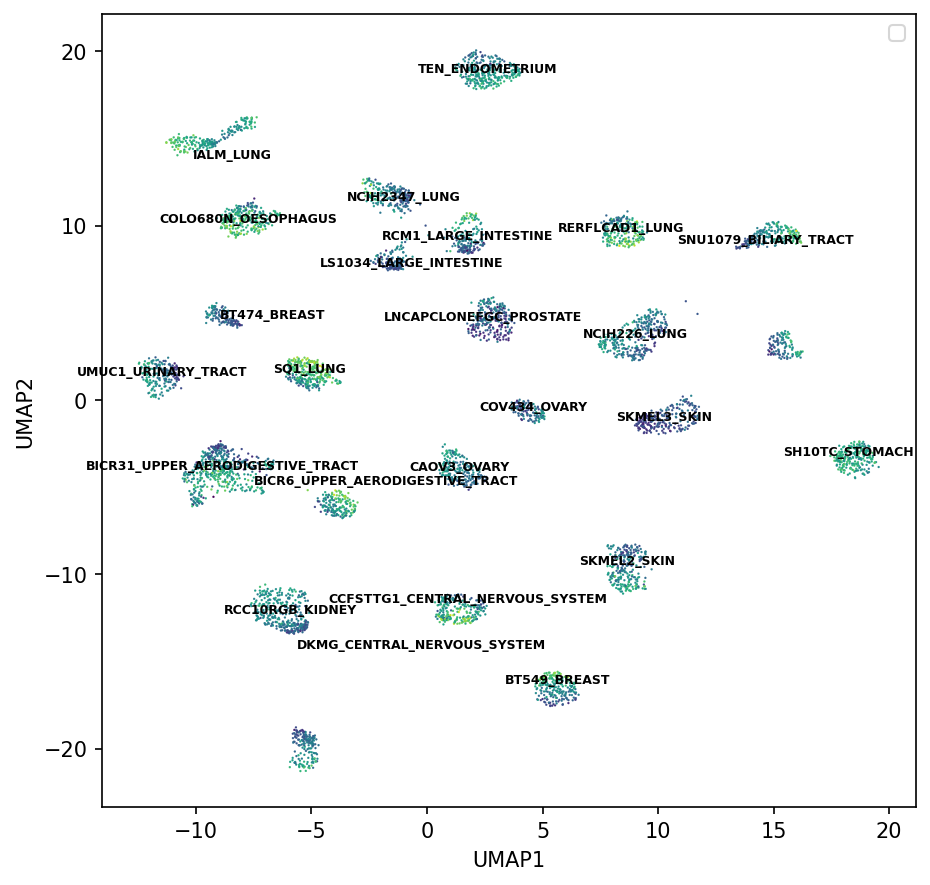

In [54]:
plt.figure(figsize=(7,7), dpi=150)
sns.scatterplot(x= data['UMAP1'], y=data['UMAP2'],  marker="o", edgecolor='face', hue=data['MAPK_activity'], 
                s=1, palette="viridis",   )        
plt.legend([])
for cell in umap_centers.index:
    plt.text(umap_centers.loc[cell, 'UMAP1'], umap_centers.loc[cell, 'UMAP2'], cell, size=6, weight='bold',
            horizontalalignment='center')

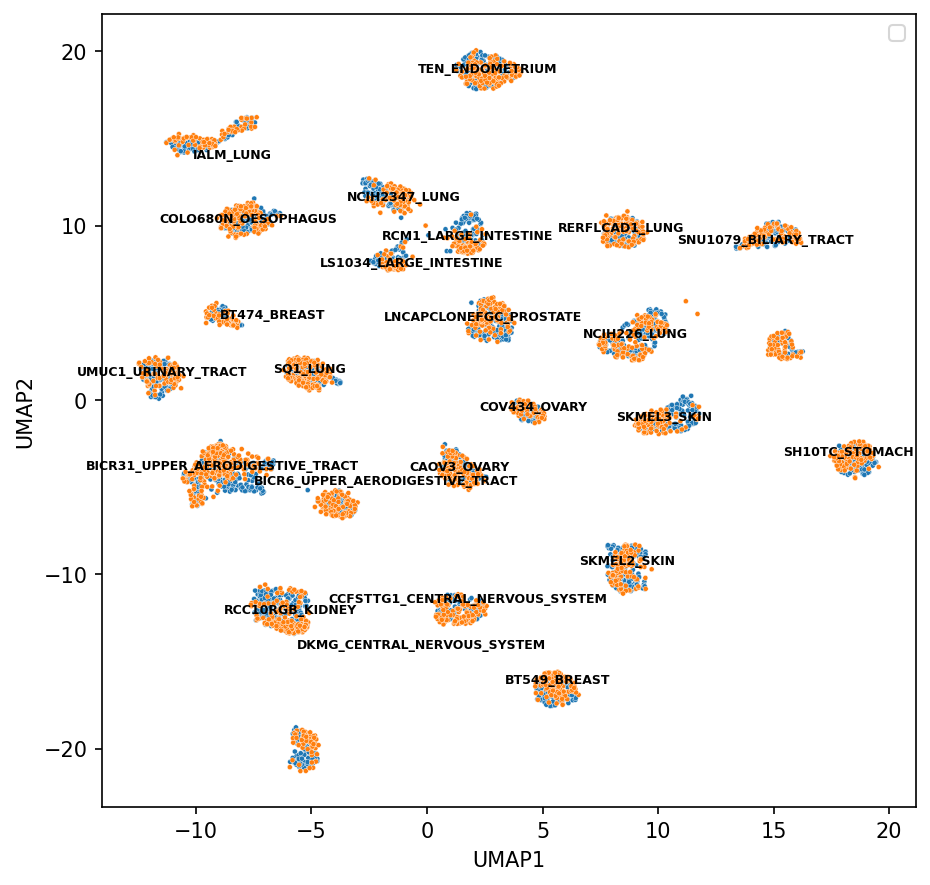

In [55]:
plt.figure(figsize=(7,7), dpi=150)
sns.scatterplot(x= data['UMAP1'], y=data['UMAP2'], hue=data['Batch'],s=6)
plt.legend([])
for cell in umap_centers.index:
    plt.text(umap_centers.loc[cell, 'UMAP1'], umap_centers.loc[cell, 'UMAP2'], cell, size=6, weight='bold',
            horizontalalignment='center')

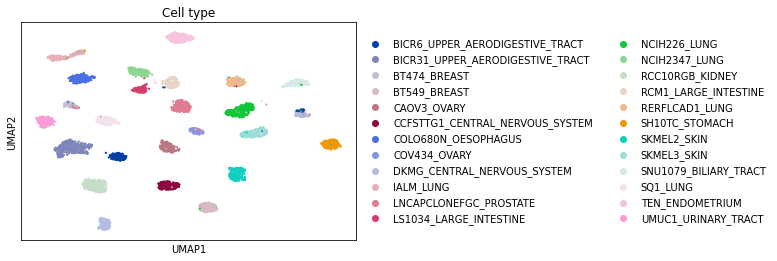

In [56]:
sc.pl.umap(adata_concat, color = 'Cell type')

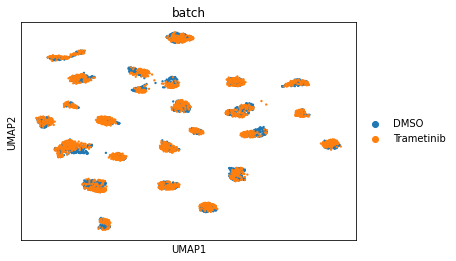

In [57]:
sc.pl.umap(adata_concat, color=['batch'])

The clusters contain cells profusely from the same cell line.

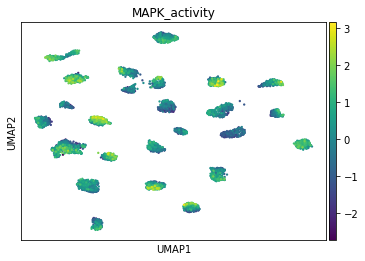

In [58]:
sc.pl.umap(adata_concat, color=['MAPK_activity']) 

The batches are comparable to MAPK activity. The MAPK genes mutation count, the individual BRAF, KRAS, HRAS, NRAS copy number variations and the mutation counts are also depicted.

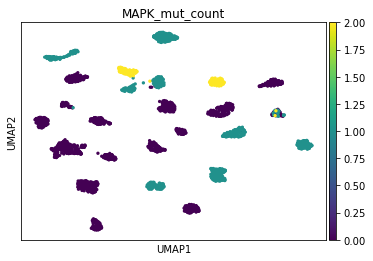

In [59]:
sc.pl.umap(adata_ref, color= ['MAPK_mut_count'])

## Assessing MAPK activity

Calculating the correlation between mutation counts and MAPK activity.

In [60]:
pearsonr(adata_concat.obs['MAPK_activity'], adata_concat.obs['MAPK_mut_count'])

(0.055947495986646466, 2.7325365826095254e-05)

Plotting the MAPK activity in regard to the batches and mutation counts.

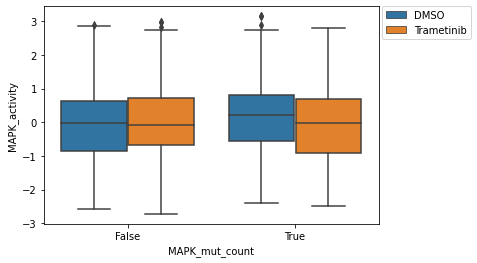

In [61]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['MAPK_mut_count']>0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

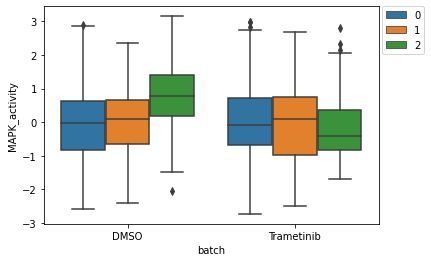

In [62]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [63]:
#adata_concat.obs['MAPK_mut_count'] = (adata_concat.obs['MAPK_mut_count']>0)*1

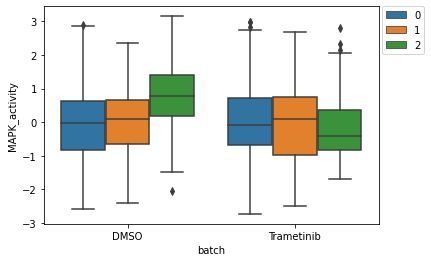

In [64]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

MAPK genes (BRAF, KRAS, NRAS, HRAS) and their copy number variations showed in UMAP.

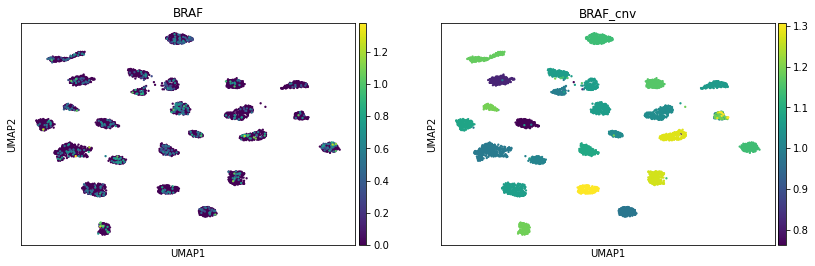

In [65]:
sc.pl.umap(adata_concat, color=['BRAF', 'BRAF_cnv'])

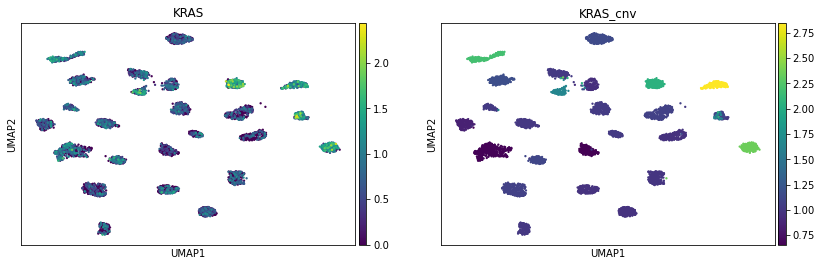

In [66]:
sc.pl.umap(adata_concat, color=['KRAS', 'KRAS_cnv'])

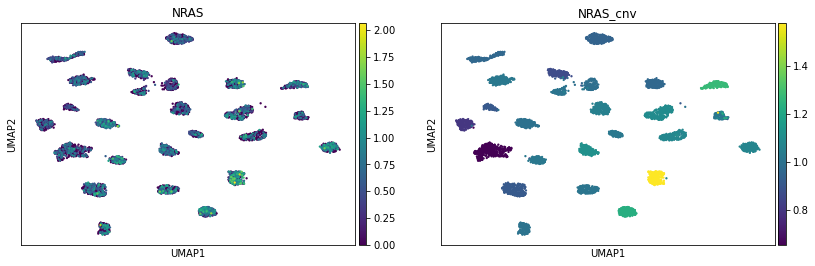

In [67]:
sc.pl.umap(adata_concat, color=['NRAS','NRAS_cnv'])

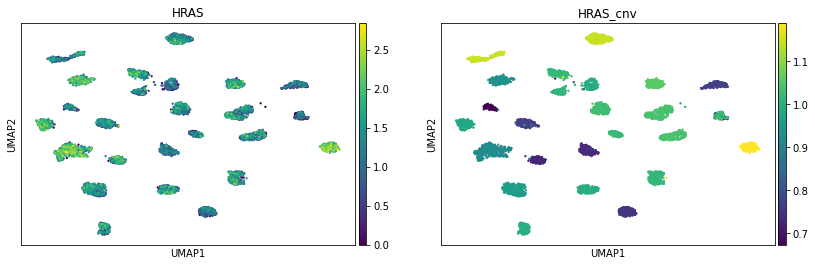

In [68]:
sc.pl.umap(adata_concat, color=['HRAS','HRAS_cnv'])

## Fitting models: MAPK activity

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

https://www.statsmodels.org/devel/example_formulas.html

In [69]:
model = smf.ols('MAPK_activity ~ MAPK_mut_count + batch', data=adata_concat.obs).fit()

In [70]:
model.params

Intercept             -0.042013
batch[T.Trametinib]    0.000630
MAPK_mut_count         0.087901
dtype: float64

In [71]:
model.pvalues

Intercept              0.051794
batch[T.Trametinib]    0.981154
MAPK_mut_count         0.000027
dtype: float64

In [72]:
model = smf.ols('MAPK_activity ~ MAPK_mut_count * batch', data=adata_concat.obs).fit()

In [73]:
model.params

Intercept                            -0.140343
batch[T.Trametinib]                   0.187063
MAPK_mut_count                        0.293631
MAPK_mut_count:batch[T.Trametinib]   -0.392869
dtype: float64

In [74]:
model.pvalues

Intercept                             4.074617e-09
batch[T.Trametinib]                   1.526983e-08
MAPK_mut_count                        2.666713e-22
MAPK_mut_count:batch[T.Trametinib]    5.141843e-21
dtype: float64

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MAPK_activity   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     35.70
Date:                Mon, 03 May 2021   Prob (F-statistic):           7.63e-23
Time:                        21:20:16   Log-Likelihood:                -7913.3
No. Observations:                5615   AIC:                         1.583e+04
Df Residuals:                    5611   BIC:                         1.586e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.1403      0.024     -5.890      0.000      -0.187      -0.094
batch[T.Trametinib]                    0.1871      0.033      5.667      0.000       0.122       0.252
MAPK_mut_count                         0.2936      0.030      9.754      0.000       0.235       0.353
MAPK_mut_count:batch[T.Trametinib]    -0.3929      0.042     -9.444      0.000      -0.474      -0.311
==============================================================================
Omnibus:                      108.424   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.413
Skew:                           0.063   Prob(JB):                     4.62e-14
Kurtosis:                       2.503   Cond. No.                         5.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# CEVIChE cell viability prediction

Download the necessary
<a href="https://saezlab.shinyapps.io/ceviche/_w_a1dec541/session/b0540761d9da082a04bdf713f386ec99/download/download_achilles_model?w=a1dec541" target="_blank">achilles_model.csv</a>. The common genes are listed, then the *'Predicted_viability'* is calculated and added to the dataframe.

In [76]:
ceviche = pd.read_csv('../data/achilles_model.csv', sep=',', header=0, index_col=0)

In [77]:
common_genes = list(set(adata_concat.var.index) & set(ceviche.index))

In [78]:
len(common_genes)

967

In [79]:
gex = adata_concat.to_df()

In [80]:
gex = gex[common_genes]
ceviche = ceviche.loc[common_genes]

In [81]:
cell_viability = np.dot(gex, ceviche)

In [82]:
cell_viability.shape

(5615, 1)

In [83]:
adata_concat.obs['Predicted_viability'] = cell_viability

The predicted viability is comparable to the MAPK activity and the mutation counts.

In [84]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,MAPK_mut_count,BRAF_cnv,KRAS_cnv,HRAS_cnv,NRAS_cnv,MAPK_activity,batch,Predicted_viability
AAACCTGAGTGTCCAT-1-DMSO,4146,4146,27650.0,1071.0,3.873418,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425,-0.392047,DMSO,0.013587
AAACCTGTCTCCTATA-1-DMSO,3364,3361,13042.0,930.0,7.130808,SH10TC_STOMACH,ACH-000764,1,1.138067,2.353112,1.189091,1.077410,-0.274693,DMSO,-0.007498
AAACGGGAGGCATGTG-1-DMSO,3175,3174,15211.0,1438.0,9.453685,UMUC1_URINARY_TRACT,ACH-000834,0,1.081538,0.854545,0.980389,0.800929,-0.204743,DMSO,-0.090404
AAACGGGAGTGCCATT-1-DMSO,3192,3192,13045.0,550.0,4.216175,COLO680N_OESOPHAGUS,ACH-000717,0,0.816903,1.177003,0.932287,1.024539,1.390834,DMSO,-0.397893
AAACGGGCAGGTCGTC-1-DMSO,3672,3671,25405.0,525.0,2.066522,NCIH226_LUNG,ACH-000367,0,1.028101,1.077028,1.038140,1.098425,-1.137955,DMSO,-0.359236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGGGATCTG-1-Trametinib,4450,4450,28847.0,1702.0,5.900094,IALM_LUNG,ACH-000672,1,1.178840,2.191558,1.147486,0.964448,0.932363,Trametinib,-0.272215
TTTGTCACATAAGACA-1-Trametinib,3693,3692,20052.0,832.0,4.149212,NCIH2347_LUNG,ACH-000875,2,1.062913,1.023199,1.019134,0.865574,-0.805954,Trametinib,-0.350491
TTTGTCATCACTGGGC-1-Trametinib,3046,3042,14861.0,1119.0,7.529776,SKMEL2_SKIN,ACH-001190,1,1.270205,0.995352,1.014137,1.578414,-0.859517,Trametinib,0.097383
TTTGTCATCCGCGCAA-1-Trametinib,3880,3880,16190.0,584.0,3.607165,COLO680N_OESOPHAGUS,ACH-000717,0,0.816903,1.177003,0.932287,1.024539,0.801747,Trametinib,-0.549660


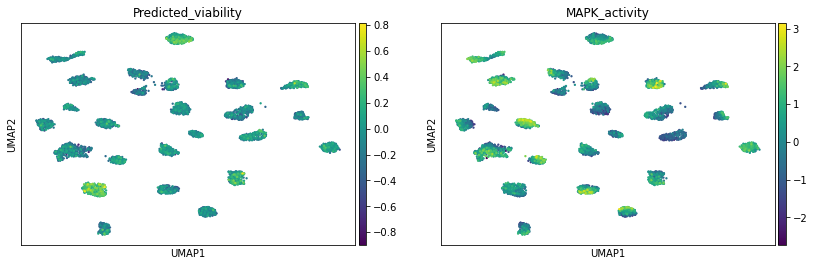

In [85]:
sc.pl.umap( adata_concat, color = ['Predicted_viability', 'MAPK_activity'] )

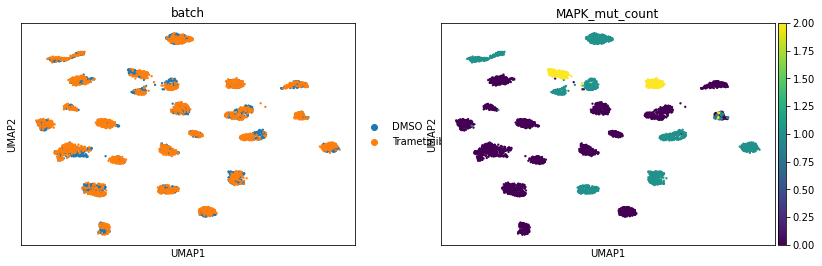

In [86]:
sc.pl.umap( adata_concat, color = ['batch', 'MAPK_mut_count'] )

In [87]:
pearsonr(adata_concat.obs['MAPK_mut_count'], adata_concat.obs['Predicted_viability'])

(-0.04711569912677181, 0.00041288149031784316)

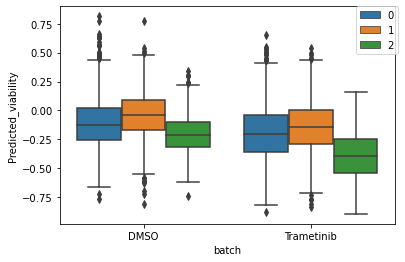

In [88]:
sns.boxplot(hue=adata_concat.obs['MAPK_mut_count'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

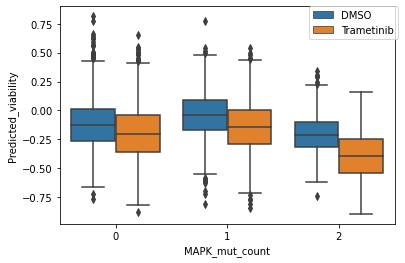

In [89]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['MAPK_mut_count'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Fitting models: cell viability

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

In [90]:
model = smf.ols('Predicted_viability ~ MAPK_mut_count + batch', data=adata_concat.obs).fit()

In [91]:
model.params

Intercept             -0.086006
batch[T.Trametinib]   -0.102032
MAPK_mut_count        -0.017796
dtype: float64

In [92]:
model.pvalues

Intercept              3.986731e-66
batch[T.Trametinib]    2.554150e-61
MAPK_mut_count         2.055200e-04
dtype: float64

In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Predicted_viability   R-squared:                       0.050
Model:                             OLS   Adj. R-squared:                  0.049
Method:                  Least Squares   F-statistic:                     146.4
Date:                 Mon, 03 May 2021   Prob (F-statistic):           1.03e-62
Time:                         21:20:19   Log-Likelihood:                 324.33
No. Observations:                 5615   AIC:                            -642.7
Df Residuals:                     5612   BIC:                            -622.8
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0860      0.005    -17.405      0.000      -0.096      -0.076
batch[T.Trametinib]    -0.1020      0.006    -16.726      0.000      -0.114      -0.090
MAPK_mut_count         -0.0178      0.005     -3.715      0.000      -0.027      -0.008
==============================================================================
Omnibus:                       36.846   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.453
Skew:                           0.194   Prob(JB):                     7.36e-09
Kurtosis:                       3.100   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model = smf.ols('Predicted_viability ~ MAPK_mut_count * batch', data=adata_concat.obs).fit()

In [95]:
model.params

Intercept                            -0.094499
batch[T.Trametinib]                  -0.085928
MAPK_mut_count                       -0.000025
MAPK_mut_count:batch[T.Trametinib]   -0.033936
dtype: float64

In [96]:
model.pvalues

Intercept                             8.605046e-65
batch[T.Trametinib]                   2.687332e-29
MAPK_mut_count                        9.971638e-01
MAPK_mut_count:batch[T.Trametinib]    4.010881e-04
dtype: float64

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Predicted_viability   R-squared:                       0.052
Model:                             OLS   Adj. R-squared:                  0.051
Method:                  Least Squares   F-statistic:                     102.0
Date:                 Mon, 03 May 2021   Prob (F-statistic):           2.73e-64
Time:                         21:20:20   Log-Likelihood:                 330.60
No. Observations:                 5615   AIC:                            -653.2
Df Residuals:                     5611   BIC:                            -626.7
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0945      0.005    -17.219      0.000      -0.105      -0.084
batch[T.Trametinib]                   -0.0859      0.008    -11.301      0.000      -0.101      -0.071
MAPK_mut_count                     -2.465e-05      0.007     -0.004      0.997      -0.014       0.014
MAPK_mut_count:batch[T.Trametinib]    -0.0339      0.010     -3.542      0.000      -0.053      -0.015
==============================================================================
Omnibus:                       39.315   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.053
Skew:                           0.199   Prob(JB):                     2.01e-09
Kurtosis:                       3.111   Cond. No.                         5.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""